In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON
import os
import pandas as pd

%matplotlib inline

In [ ]:
sparql = SPARQLWrapper("http://localhost:9999/blazegraph/namespace/kb/sparql")

In [ ]:
def sparql_result_to_df(result):
    cols = result['head']['vars']
    rows_dicts = result['results']['bindings']
    rows = [{c: r.get(c, {'value': None})['value'] for c in cols} for r in rows_dicts]
    return pd.DataFrame(rows)[cols]

In [ ]:
queryString = """
    prefix dcterm: <http://purl.org/dc/terms/> 
    select ?type (count(?s) as ?count)
    {
        ?s dcterm:type ?type.
    }
    group by ?type
"""

sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
ret = sparql.query()
result = ret.convert()
sparql_result_to_df(result)

In [ ]:
# wich attributes can appear multiple times?
queryString = """
    prefix dcterm: <http://purl.org/dc/terms/> 
    select ?p (count(?o) as ?count) 
    {
        ?s dcterm:type "Jurisprudentie".
        ?s ?p ?o.
    }
    group by ?p
    having(count(?o)>1)
    order by ?p
"""

sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
ret = sparql.query()
result = ret.convert()
sparql_result_to_df(result)

## Legislation

In [28]:
# Legislation titles
queryString = """
    prefix dcterm: <http://purl.org/dc/terms/> 
    prefix overheidrl: <http://linkeddata.overheid.nl/terms/>
    select ?article ?title (count(*) as ?cnt)
    {
        ?source dcterm:type "Jurisprudentie".
        ?article dcterm:type "Wet".
        ?link_id overheidrl:heeftLinktype ?link_type.
        ?link_id overheidrl:linktVan  ?source.
        ?link_id overheidrl:linktNaar  ?article.
        ?link_type rdfs:label ?link_type_label.
        ?article dcterm:title ?title
    }
    group by ?article ?title
"""

sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
ret = sparql.query()
result = ret.convert()
law_titles = sparql_result_to_df(result)
law_titles.sort_values('cnt', ascending=False)

,article,title,cnt
1671,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,"Wetboek van Strafvordering, Artikel 218",99
2565,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,"Wetboek van Strafvordering, Artikel 460",99
2650,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,"Algemene wet inzake rijksbelastingen, Artikel 47",97
6137,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,"Wetboek van Strafvordering, Artikel 450",91
9738,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Wetboek van Strafrecht,909
2579,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,"Wetboek van Strafvordering, Artikel 365a",90
10823,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Algemene wet bestuursrecht,90
2703,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,"Wet op de loonbelasting 1964, Artikel 11",9
2082,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Wet op de vennootschapsbelasting 1969,9
7215,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Wetboek van Strafvordering,9


In [115]:
law_titles['cnt'] = law_titles['cnt'].astype('int')

law_titles_unique = law_titles.groupby('title')['cnt'].sum().sort_values(ascending=False)
print(law_titles_unique.shape)
law_titles_unique

(7171,)


title
Wet op de rechterlijke organisatie, Artikel 81        14555
Wetboek van Strafvordering                             3641
Wetboek van Strafrecht                                 2428
Wet op de rechterlijke organisatie, Artikel 80a        1239
Wetboek van Strafvordering, Artikel 359                 731
Opiumwet                                                720
Wetboek van Burgerlijke Rechtsvordering                 715
Wet waardering onroerende zaken                         714
Burgerlijk Wetboek Boek 6                               714
Wetboek van Strafvordering, Artikel 552a                700
Wetboek van Strafvordering, Artikel 457                 658
Burgerlijk Wetboek Boek 7                               475
Wetboek van Strafvordering, Artikel 359a                443
Wetboek van Strafvordering, Artikel 440                 438
Wet op de omzetbelasting 1968                           429
Algemene wet bestuursrecht                              424
Algemene wet inzake rijksbelasting

In [ ]:
# Legislation references
# Links between cases
queryString = """
    prefix dcterm: <http://purl.org/dc/terms/> 
    prefix overheidrl: <http://linkeddata.overheid.nl/terms/>
    select ?link_id ?source ?article ?link_type ?link_type_label  ?title
    {
        ?source dcterm:type "Jurisprudentie".
        ?article dcterm:type "Wet".
        ?link_id overheidrl:heeftLinktype ?link_type.
        ?link_id overheidrl:linktVan  ?source.
        ?link_id overheidrl:linktNaar  ?article.
        ?link_type rdfs:label ?link_type_label.
        optional {?article dcterm:title ?title}
    }
"""

sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
ret = sparql.query()
result = ret.convert()
legislation = sparql_result_to_df(result)
legislation.shape

In [ ]:
legislation['title'].value_counts().head(20)

In [ ]:
legislation.to_csv(os.path.join(outpath, 'hr_simple_legislation_links.csv'), index=False)

In [ ]:
# Legislation network
# Connections between legislation through common case
queryString = """
    prefix dcterm: <http://purl.org/dc/terms/> 
    prefix overheidrl: <http://linkeddata.overheid.nl/terms/>
    select ?article1 ?article2 ?title1 ?title2 (count(distinct ?source) as ?cnt)
    {
        ?source dcterm:type "Jurisprudentie".
        ?article1 dcterm:type "Wet".
        ?article2 dcterm:type "Wet".
        ?link_id1 overheidrl:linktVan  ?source.
        ?link_id1 overheidrl:linktNaar  ?article1.
        optional {?article1 dcterm:title ?title1}
        ?link_id2 overheidrl:linktVan  ?source.
        ?link_id2 overheidrl:linktNaar  ?article2.
        optional {?article1 dcterm:title ?title2}
    }
    group by ?article1 ?article2 ?title1 ?title2
"""

sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
ret = sparql.query()
result = ret.convert()
legislation_network = sparql_result_to_df(result)
legislation_network.shape

In [63]:
legislation_network['cnt'] = legislation_network['cnt'].astype('int')

In [81]:
# Filter self loops 
legislation_network = legislation_network[~(legislation_network['article1']==legislation_network['article2'])]

In [89]:
legislation_network.head()

,article1,article2,title1,title2,cnt
0,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Burgerlijk Wetboek Boek 3,Burgerlijk Wetboek Boek 3,2
1,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Burgerlijk Wetboek Boek 3,Burgerlijk Wetboek Boek 3,2
3,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Burgerlijk Wetboek Boek 3,Burgerlijk Wetboek Boek 3,1
4,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Burgerlijk Wetboek Boek 3,Burgerlijk Wetboek Boek 3,2
5,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Burgerlijk Wetboek Boek 3,Burgerlijk Wetboek Boek 3,1


In [82]:
legislation_network_grouped = legislation_network.groupby(['article1', 'article2'])['cnt'].sum()

In [93]:
legislation_network_matrix = legislation_network_grouped.unstack(fill_value=0)

In [94]:
legislation_network_matrix.shape

(11707, 11707)

In [95]:
import numpy as np
m = legislation_network_matrix.as_matrix()
m

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [70]:
np.all(m==m.T)

False

In [96]:
np.sum(m != m.T)

1898

In [30]:
outpath = '/media/sf_VBox_Shared/networks/caselaw/'

In [97]:
legislation_network_grouped.to_csv(os.path.join(outpath, 'legislation_links.csv'), 
                                   index=True, index_label=['source', 'target'], header='True')

In [116]:
# Now group by name 
legislation_network_grouped_name = legislation_network.groupby(['title1', 'title2'])['cnt'].sum()
legislation_network_grouped_name.shape

(7129,)

In [117]:
# Remove self-loops
legislation_network_grouped_name = legislation_network_grouped_name[legislation_network_grouped_name.index[
    [s!=t for (s,t) in legislation_network_grouped_name.index]]]

In [118]:
print(legislation_network_grouped_name.shape)
legislation_network_grouped_name.sort_values(ascending=False).head()

(30,)


title1                                                                                          title2                                                                                        
Wetboek van Burgerlijke Rechtsvordering, Artikel 843a                                           Wetboek van Burgerlijke Rechtsvordering (geldt in geval van digitaal procederen), Artikel 843a    237
Wetboek van Burgerlijke Rechtsvordering (geldt in geval van digitaal procederen), Artikel 843a  Wetboek van Burgerlijke Rechtsvordering, Artikel 843a                                             237
Wetboek van Burgerlijke Rechtsvordering, Artikel 401a                                           Wetboek van Burgerlijke Rechtsvordering (geldt in geval van digitaal procederen), Artikel 401a    229
Wetboek van Burgerlijke Rechtsvordering (geldt in geval van digitaal procederen), Artikel 401a  Wetboek van Burgerlijke Rechtsvordering, Artikel 401a                                             229
Wetboek van Burge

In [120]:
legislation_network_grouped_name.to_csv(os.path.join(outpath, 'legislation_titles_links.csv'), 
                                   index=True, index_label=['source', 'target'], header='True', sep='\t')

In [32]:
law_titles.to_csv(os.path.join(outpath, 'legislation_nodes.csv'), index=False)

In [111]:
law_titles.shape, legislation_network_grouped.shape, legislation_network_grouped_name.shape

((11895, 3), (216232,), (30,))

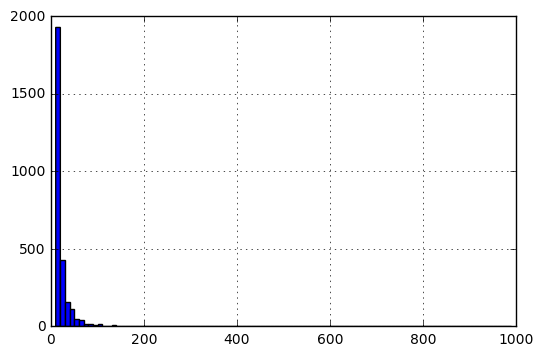

In [99]:
legislation_network_grouped.hist(bins=range(10, 1000, 10))

In [100]:
legislation_network_grouped.sort_values(ascending=False).head()

article1                                                                              article2                                                                            
http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001903/3010844/2015-11-17/2015-11-17  http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001903/3010844/2016-08-11/2016-08-11    1325
http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001903/3010844/2016-08-11/2016-08-11  http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001903/3010844/2015-11-17/2015-11-17    1325
http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001854/2970494/2016-04-20/2016-04-20  http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001854/2970494/2016-07-01/2016-07-01     866
http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001854/2970494/2016-07-01/2016-07-01  http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001854/2970494/2016-04-20/2016-04-20     866
http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001830/2637694/2002-01-01/2002-01-01  http://linkeddata.overheid.

In [101]:
legislation_network_grouped_10 = legislation_network_grouped[legislation_network_grouped>10]
print(legislation_network_grouped_10.shape)
legislation_network_grouped_10.to_csv(os.path.join(outpath, 'legislation_links_10plus.csv'), 
                                   index=True, index_label=['source', 'target'], header='True')

(2436,)


## Filter cases based on legislation

In [ ]:
# Filter cases on 81 RO - maybe not because can still contain references
ref81ro = legislation[legislation['title']=='Wet op de rechterlijke organisatie, Artikel 81']
cases_filtered = cases[~cases.id.isin(ref81ro['source'].unique())]
cases_filtered.shape